In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [2]:
train_dir = './clean-dataset/train'
validation_dir = './clean-dataset/validation'
image_size = 224

## Experiment 1: Freezing all layers - Same as Transfer Learning
Create the model

In [3]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.topology.InputLayer object at 0x7f2eed2f01d0> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed2f0240> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed2f0390> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eed2f0518> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed29fa58> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed29f860> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eed23f3c8> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed260710> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed260048> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed203f28> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eed225da0> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed1c8278> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed1c8898> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed1e97f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eed17c240> Fa

## Experiment 1
Train the model

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/20
6/6 [==============================] - 5s - loss: 3.9083 - acc: 0.4633 - val_loss: 0.9497 - val_acc: 0.5800
Epoch 2/20
6/6 [==============================] - 2s - loss: 1.3948 - acc: 0.5717 - val_loss: 0.5033 - val_acc: 0.7933
Epoch 3/20
6/6 [==============================] - 2s - loss: 0.2767 - acc: 0.9167 - val_loss: 0.3672 - val_acc: 0.8733
Epoch 4/20
6/6 [==============================] - 2s - loss: 0.4351 - acc: 0.8233 - val_loss: 1.4450 - val_acc: 0.6667
Epoch 5/20
6/6 [==============================] - 2s - loss: 0.3103 - acc: 0.8967 - val_loss: 0.3865 - val_acc: 0.8667
Epoch 6/20
6/6 [==============================] - 2s - loss: 0.2525 - acc: 0.8867 - val_loss: 0.3298 - val_acc: 0.8733
Epoch 7/20
6/6 [==============================] - 2s - loss: 0.0763 - acc: 0.9850 - val_loss: 0.2922 - val_acc: 0.9000
Epoch 8/20
6/6 [==============================] - 2s - loss: 0.3435 - acc: 0.8650 - v

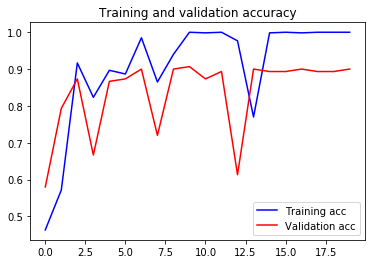

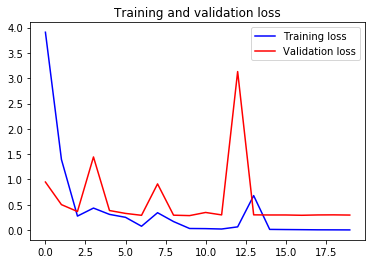

In [4]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Experiment 1
Show the errors

Found 150 images belonging to 3 classes.
15/15 [==============================] - 0s     
No of errors = 15/150


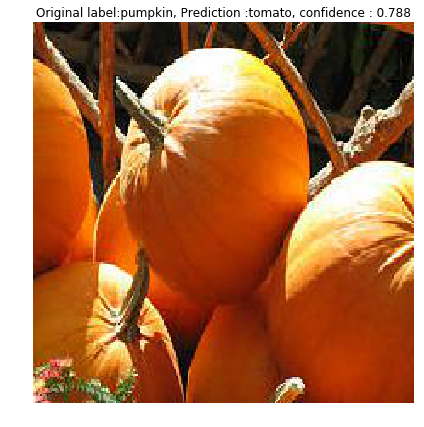

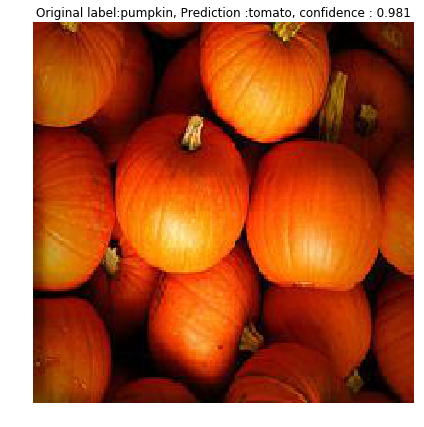

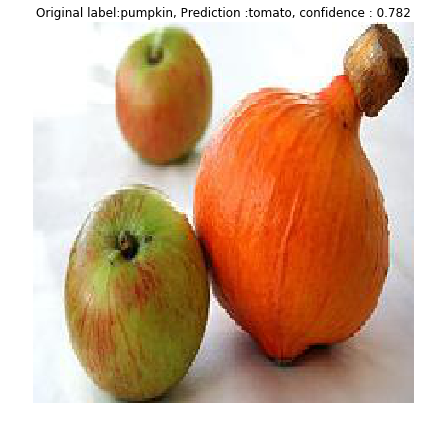

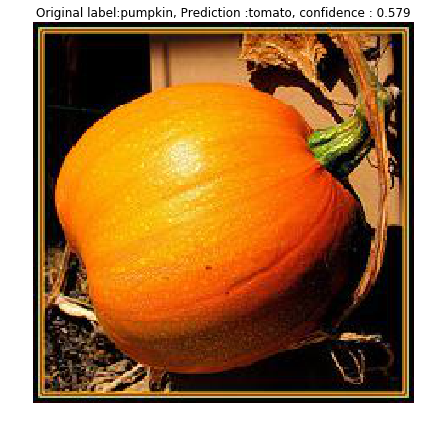

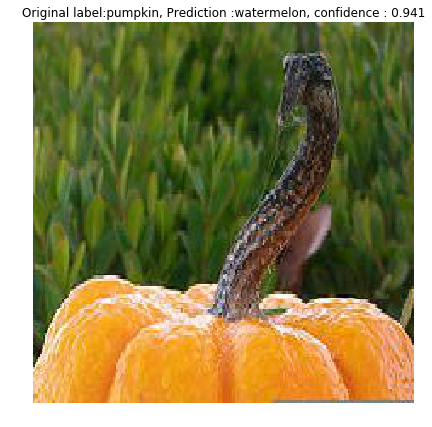

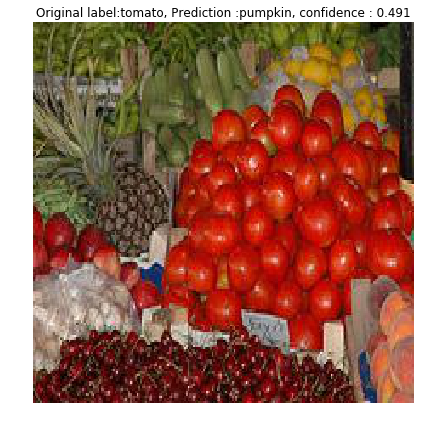

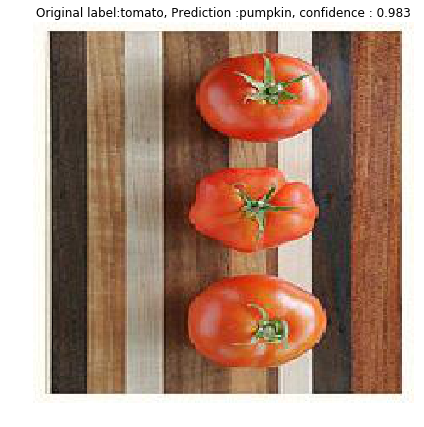

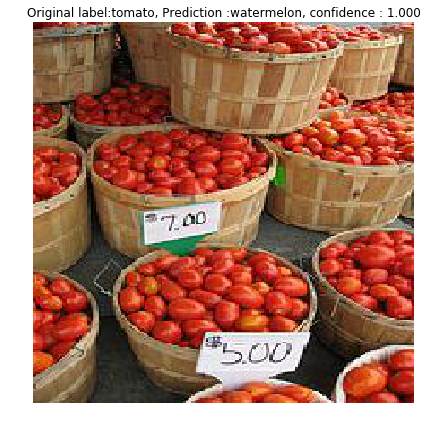

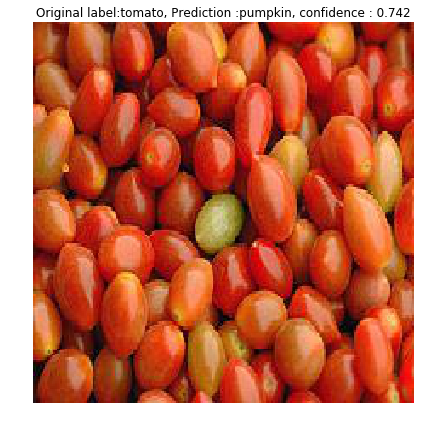

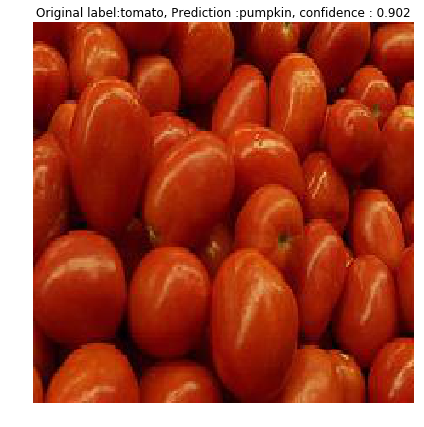

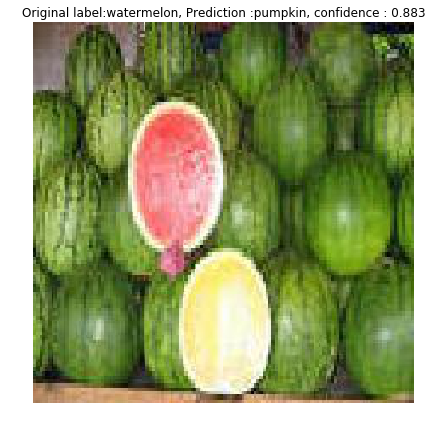

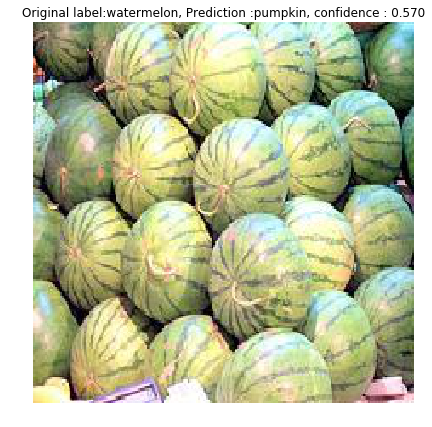

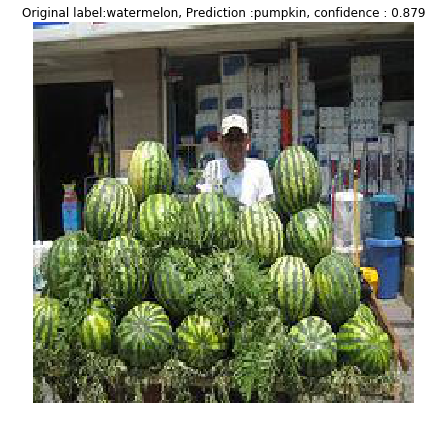

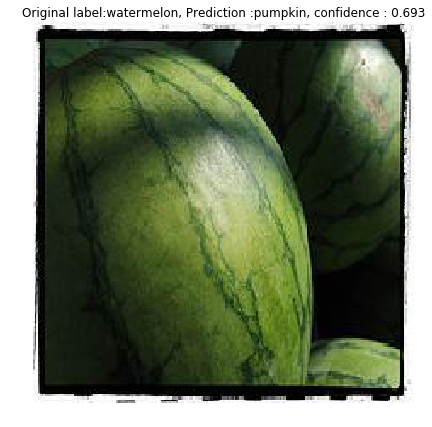

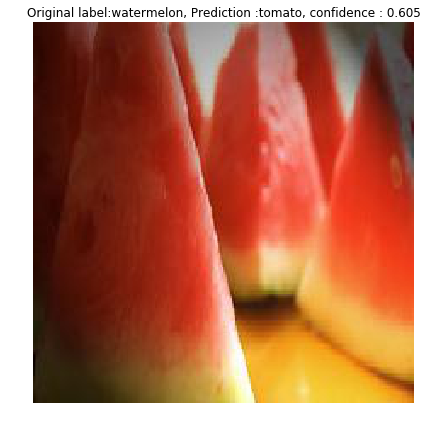

In [5]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

## Experiment 2 : Train Last 4 layers without data augmentation

In [6]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.topology.InputLayer object at 0x7f2eed0acb38> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed0acd30> False
<keras.layers.convolutional.Conv2D object at 0x7f2eed0accc0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eed0acef0> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec6d40f0> False
<keras.layers.convolutional.Conv2D object at 0x7f2eecd46b00> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eec9f4e10> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec73b400> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec73bf28> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec707c88> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eec946a90> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec942b38> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec90a898> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec91d438> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eec9046d8> Fa

## Experiment 2
Train the model

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/20
6/6 [==============================] - 3s - loss: 1.6173 - acc: 0.3750 - val_loss: 0.9232 - val_acc: 0.5267
Epoch 2/20
6/6 [==============================] - 2s - loss: 1.3934 - acc: 0.4667 - val_loss: 0.9972 - val_acc: 0.4533
Epoch 3/20
6/6 [==============================] - 2s - loss: 0.7030 - acc: 0.7083 - val_loss: 1.2722 - val_acc: 0.5067
Epoch 4/20
6/6 [==============================] - 2s - loss: 0.6560 - acc: 0.7550 - val_loss: 0.4921 - val_acc: 0.8200
Epoch 5/20
6/6 [==============================] - 2s - loss: 0.2209 - acc: 0.9233 - val_loss: 0.2649 - val_acc: 0.9133
Epoch 6/20
6/6 [==============================] - 2s - loss: 0.2152 - acc: 0.9317 - val_loss: 0.2200 - val_acc: 0.9267
Epoch 7/20
6/6 [==============================] - 2s - loss: 0.0858 - acc: 0.9783 - val_loss: 0.6216 - val_acc: 0.8000
Epoch 8/20
6/6 [==============================] - 2s - loss: 0.2533 - acc: 0.9050 - v

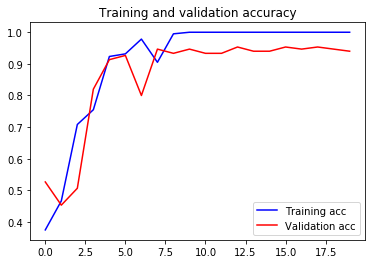

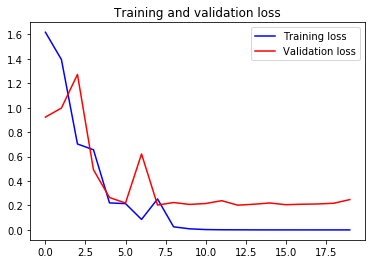

In [7]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('last4_layers.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Experiment 2
Show the errors

Found 150 images belonging to 3 classes.
15/15 [==============================] - 0s     
No of errors = 9/150


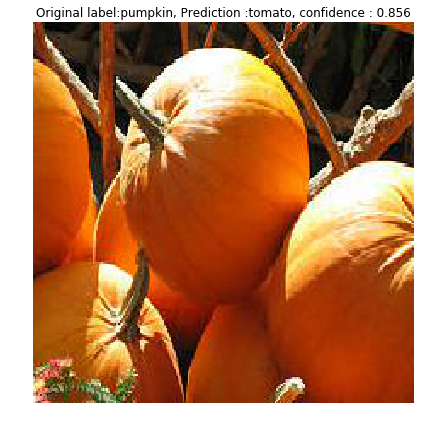

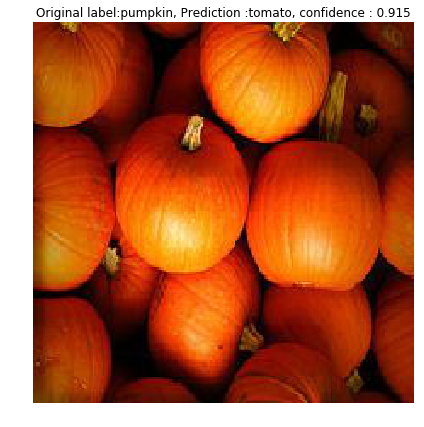

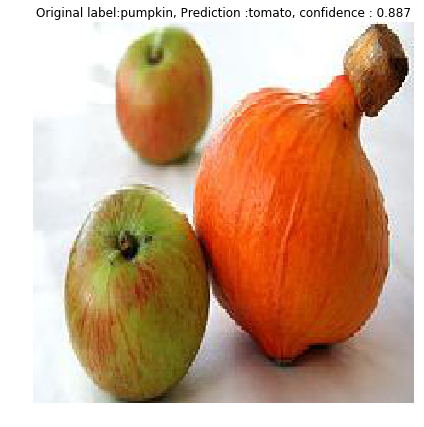

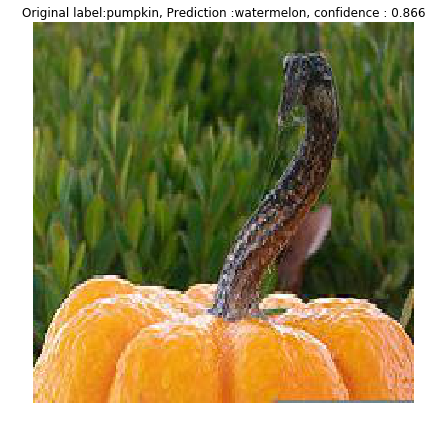

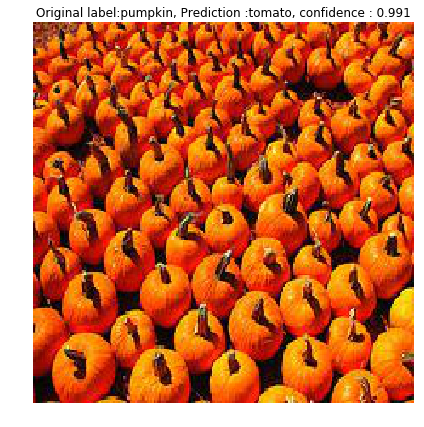

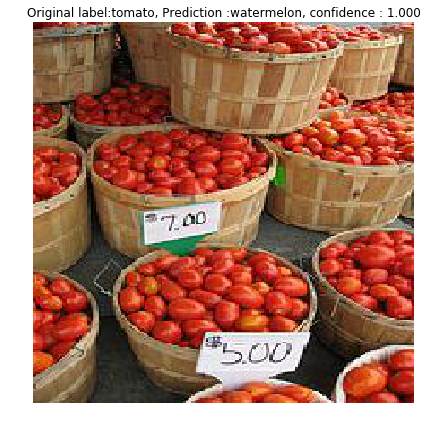

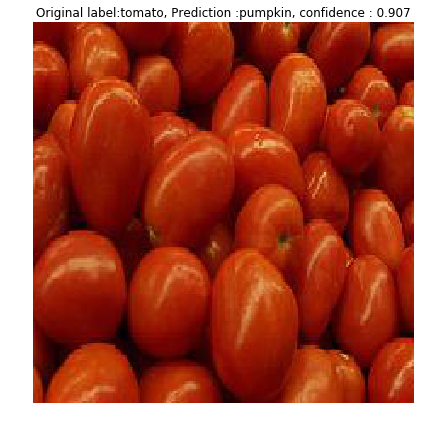

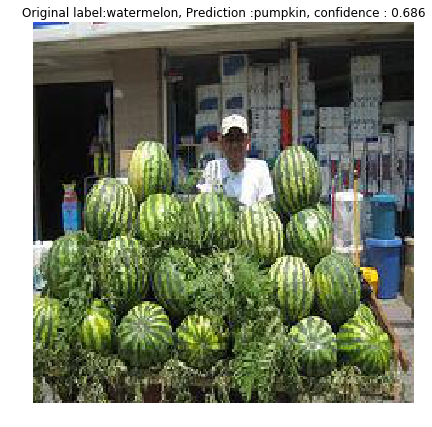

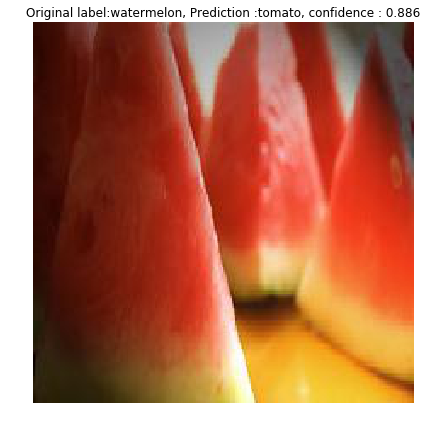

In [8]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

## Experiment 3 : Train last 4 layers with data augmentation


In [12]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.topology.InputLayer object at 0x7f2eec8eeba8> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec8ee320> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec8eed30> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eeb9551d0> False
<keras.layers.convolutional.Conv2D object at 0x7f2eeb8f9dd8> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec5e3a58> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eeb906b00> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea3b61d0> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea3b6518> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea3a3b70> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eea3df630> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea3d6a20> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea3d6828> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea25a908> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eea27bef0> Fa

## Experiment 3
Train the model. Here we will be using the imageDataGenerator for data augmentation.

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/40
24/24 [==============================] - 8s - loss: 1.0960 - acc: 0.5783 - val_loss: 0.3230 - val_acc: 0.9200
Epoch 2/40
24/24 [==============================] - 7s - loss: 0.4048 - acc: 0.8558 - val_loss: 0.1907 - val_acc: 0.9533
Epoch 3/40
24/24 [==============================] - 8s - loss: 0.1802 - acc: 0.9392 - val_loss: 0.2353 - val_acc: 0.9333
Epoch 4/40
24/24 [==============================] - 7s - loss: 0.1277 - acc: 0.9517 - val_loss: 0.1922 - val_acc: 0.9667
Epoch 5/40
24/24 [==============================] - 8s - loss: 0.1963 - acc: 0.9417 - val_loss: 0.1390 - val_acc: 0.9800
Epoch 6/40
24/24 [==============================] - 7s - loss: 0.0414 - acc: 0.9908 - val_loss: 0.3272 - val_acc: 0.9533
Epoch 7/40
24/24 [==============================] - 7s - loss: 0.1018 - acc: 0.9717 - val_loss: 0.1854 - val_acc: 0.9733
Epoch 8/40
24/24 [==============================] - 7s - loss: 0.0733 -

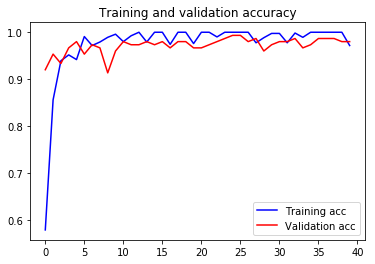

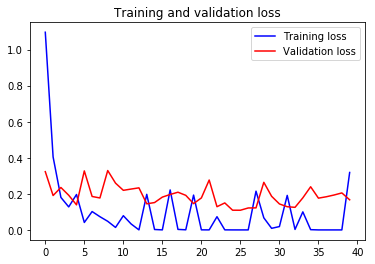

In [13]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 50
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
# NOTE that we have multiplied the steps_per_epoch by 2. This is because we are using data augmentation.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2*train_generator.samples/train_generator.batch_size ,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('da_last4_layers.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Experiment 3
Show the errors

Found 150 images belonging to 3 classes.
15/15 [==============================] - 0s     
No of errors = 3/150


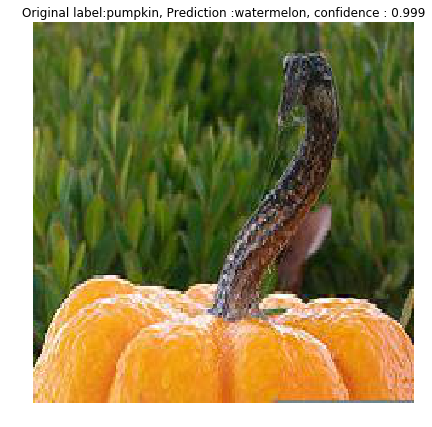

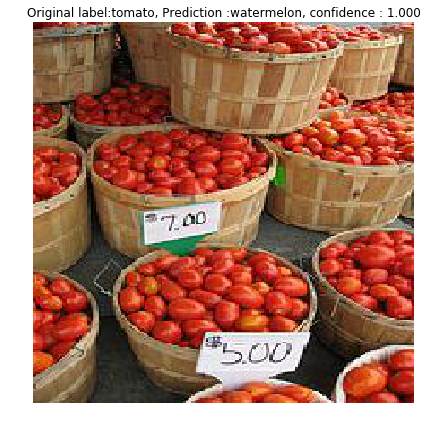

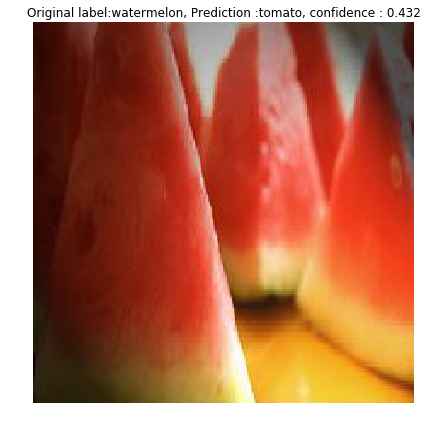

In [14]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()